In [ ]:
Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Step 2: Load the Dataset

In [2]:
df = pd.read_csv("adult_with_headers.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Step 3: Data Exploration
Data Exploration and Preprocessing

In [6]:
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [7]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [8]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [10]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [13]:
df.columns = df.columns.str.strip()

In [14]:
numerical_col = 'actual_numerical_column_name'
categorical_col = 'actual_categorical_column_name'

In [15]:
print("Numerical Columns:", df.select_dtypes(include=['number']).columns)

Numerical Columns: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [16]:
print("Categorical Columns:", df.select_dtypes(include=['object']).columns)

Categorical Columns: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [17]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean())

In [18]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [19]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [20]:
numerical_col = 'correct_column_name'

In [21]:
scaler = StandardScaler()
df['standard_scaled_column'] = scaler.fit_transform

In [23]:
minmax_scaler = MinMaxScaler()
df['minmax_scaled_column'] = minmax_scaler.fit_transform

# Encoding Techniques

In [24]:
label_encoder = LabelEncoder()
df['label_encoded_column'] = label_encoder.fit_transform

In [25]:
df = pd.get_dummies(df, columns=['sex', 'relationship', 'race'], drop_first=True)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['occupation'] = le.fit_transform(df['occupation'])


In [29]:
# One-Hot Encoding

In [ ]:
Pros:
No Ordinal Relationship Assumption: One-Hot Encoding does not assume any ordering between categories. This is useful when the categorical feature is nominal (i.e., the categories do not have a meaningful order), such as "Color" (Red, Blue, Green).

Preventing Algorithm Misinterpretation: Many machine learning algorithms (like decision trees and linear models) may misinterpret numerical encoding as having an ordinal relationship (e.g., "2" is greater than "1"). One-Hot Encoding avoids this problem because all categories are treated equally.

Improved Accuracy for Some Models: In some cases, One-Hot Encoding may lead to better model performance, especially for algorithms that do not inherently handle categorical data, such as linear regression or neural networks.

In [ ]:
Cons:
Increased Dimensionality: One of the biggest drawbacks is that it increases the dimensionality of the dataset significantly, especially if the categorical feature has many unique values (e.g., a column with 100 different cities will result in 100 new columns). This can lead to higher memory usage and slower model training times.

Sparsity: The resulting matrix will be sparse (containing many zeros), which can lead to inefficiencies in both computation and memory usage, particularly with high-cardinality categorical variables (many unique categories).

Potential Overfitting: With high cardinality, One-Hot Encoding might cause overfitting in some models, as the model may start to learn very specific patterns related to each category.

In [31]:
# Label Encoding
# Definition: Label Encoding converts each category into a unique integer

In [ ]:
Pros:
Simple and Efficient: Label Encoding is computationally efficient because it only requires one column for the entire categorical feature, regardless of how many categories there are. This keeps the feature space small and avoids the issue of dimensionality increase.

Works Well for Ordinal Data: Label Encoding is especially useful for ordinal data, where there is a natural order between categories (e.g., "Low", "Medium", "High"). The encoded integers (e.g., 0, 1, 2) preserve the order, which can be beneficial for models that can interpret ordinal relationships (e.g., decision trees, some gradient boosting methods).

Memory Efficient: Since Label Encoding only creates a single column of integers, it does not suffer from the high dimensionality or sparsity issues that One-Hot Encoding does.

In [ ]:
Cons:
Assumes Ordinality: Label Encoding introduces an implicit ordinal relationship between categories, which might not be appropriate for nominal (unordered) features. For instance, encoding colors ["Red", "Green", "Blue"] as [0, 1, 2] would suggest that "Green" is "greater" than "Red" and "Blue" is "greater" than "Green," which is nonsensical.
Assumes an ordinal relationship, which might not exist.

# Feature Engineering

In [33]:
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'numerical_column': [10, 20, 30, 40],
    'group_column': ['A', 'B', 'A', 'B']
})


In [34]:
df['new_feature1'] = df['feature1'] * df['feature2']
df['new_feature2'] = df.groupby('group_column')['numerical_column'].transform('mean')

In [35]:
skewed_feature = 'skewed_numerical_column'

In [39]:
print(df.columns)

Index(['feature1', 'feature2', 'numerical_column', 'group_column',
       'new_feature1', 'new_feature2'],
      dtype='object')


In [44]:
df['numerical_column'] = np.log1p(df['numerical_column'])

In [46]:
df['feature1'] = np.log1p(df['feature1'])

[Text(0.5, 1.0, 'numerical_column')]

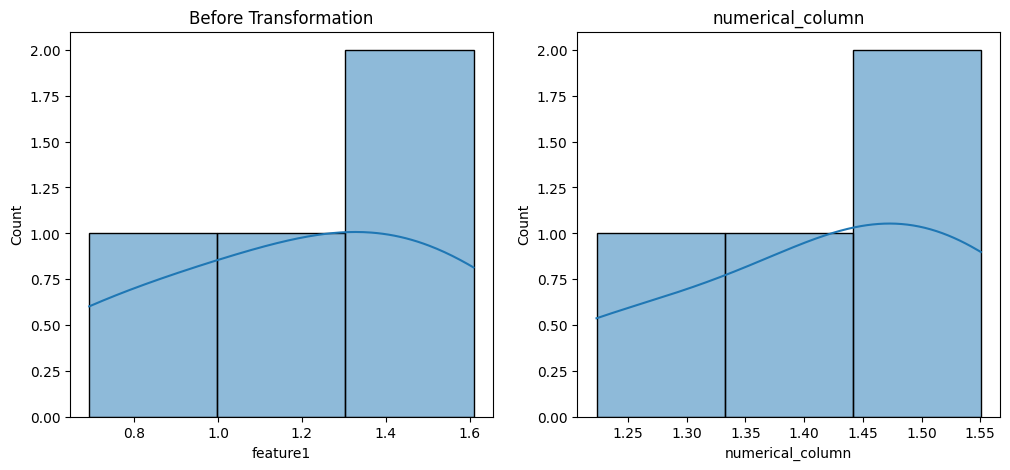

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['feature1'], ax=ax[0], kde=True).set(title='Before Transformation')
sns.histplot(df['numerical_column'], ax=ax[1], kde=True).set(title='numerical_column')

In [53]:
# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)  
outliers = iso.fit_predict(df[['numerical_column', 'numerical_column']])  
df = df[df['outliers'] == 1] 

In [56]:
# pip install ppscore

In [57]:
import ppscore as pps

ModuleNotFoundError: No module named 'ppscore'

In [55]:
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, cmap="coolwarm", annot=True).set(title="Predictive Power Score Matrix")


NameError: name 'pps' is not defined